In [1]:
import csv
from datetime import datetime

file_path = 'Games.csv'  
cleaned_data = []
duplicates = 0

with open(file_path, 'r') as file:
    reader = csv.DictReader(file)
    seen_rows = set()
    
    for row in reader:
        row['Series'] = row['Series'] if row['Series'] else 'Unknown'
        
        try:
            release_date = datetime.strptime(row['Release'], '%b-%y')
            row['Release'] = release_date.strftime('%Y-%m-%d')
            row['Release_Year'] = release_date.year
            row['Release_Month'] = release_date.month
        except ValueError:
            row['Release'] = 'Invalid Date'
            row['Release_Year'] = None
            row['Release_Month'] = None
        
        row_tuple = tuple(row.values())
        if row_tuple not in seen_rows:
            seen_rows.add(row_tuple)
            cleaned_data.append(row)
        else:
            duplicates += 1

output_file = 'Games_Cleaned.csv'
fieldnames = list(cleaned_data[0].keys())

with open(output_file, 'w', newline='') as outfile:
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(cleaned_data)

print(f"Duplicates Removed: {duplicates}")
print(f"Data Shape After Cleaning: {len(cleaned_data)} rows")


Duplicates Removed: 0
Data Shape After Cleaning: 175 rows


Just taking a look at the data in a "pd" fromat

In [2]:
import pandas as pd

data = pd.read_csv(output_file)
print(data)


                                     Name  Sales          Series     Release  \
0           PlayerUnknown's Battlegrounds   42.0         Unknown  2017-12-01   
1                               Minecraft   33.0       Minecraft  2011-11-01   
2                              Diablo III   20.0          Diablo  2012-05-01   
3                             Garry's Mod   20.0         Unknown  2006-11-01   
4                                Terraria   17.2         Unknown  2011-05-01   
..                                    ...    ...             ...         ...   
170                              Vietcong    1.0        Vietcong  2003-03-01   
171    Warhammer Online: Age of Reckoning    1.0       Warhammer  2008-09-01   
172        Who Wants to Be a Millionaire?    1.0         Unknown  1999-11-01   
173  Wing Commander 3: Heart of the Tiger    1.0  Wing Commander  1994-12-01   
174                            Zoo Tycoon    1.0      Zoo Tycoon  2001-10-01   

                       Genre           

My goal here was to calculate the total sales grouped by release year. Then sort the results by year and print the sorted summary. After that I wanted to create a graph overseeing the result to establish patterns and outliers. 

    Release_Year                                               Name  Sales  \
0           1984                                            Hydlide    1.0   
1           1985  Where in the World Is Carmen Sandiego?Internat...    5.5   
2           1988                          Last Ninja 2RoboCopTetris    7.5   
3           1989                                           Populous    4.0   
4           1993     MystDoomReturn to ZorkStar Wars: Rebel Assault    6.5   
5           1994  Doom II: Hell on EarthWing Commander 3: Heart ...    3.0   
6           1995  Command & ConquerCaesar IIWarcraft II: Tides o...   10.5   
7           1996  Command & Conquer: Red AlertLords of the Realm...   11.5   
8           1997  Age of EmpiresPODBlade RunnerDeer HunterFrogge...   10.0   
9           1998  StarCraftHalf-LifeFinal Fantasy VIIAnno 1602Ba...   29.1   
10          1999  SimCity 3000RollerCoaster TycoonEverQuestCaesa...   20.5   
11          2000  The SimsDiablo IIBaldur's Gate II: Shadows of 

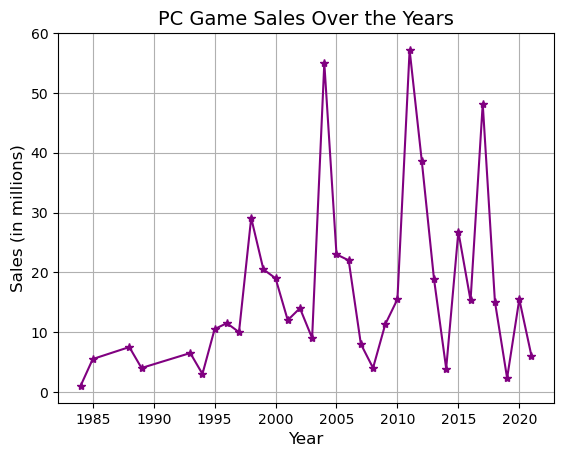

In [3]:
sales_by_year = data.groupby(by = 'Release_Year').sum().reset_index()
sales_by_year = sales_by_year.sort_values('Release_Year')
print(sales_by_year)

import matplotlib.pyplot as plt

plt.plot(sales_by_year['Release_Year'], sales_by_year['Sales'], marker = '*', color = 'purple')
plt.title('PC Game Sales Over the Years', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Sales (in millions)', fontsize = 12)
plt.grid(True)
plt.show()

In this part the job is to create a bar graphs with the suitable namings to have another more easily followed visualisation.

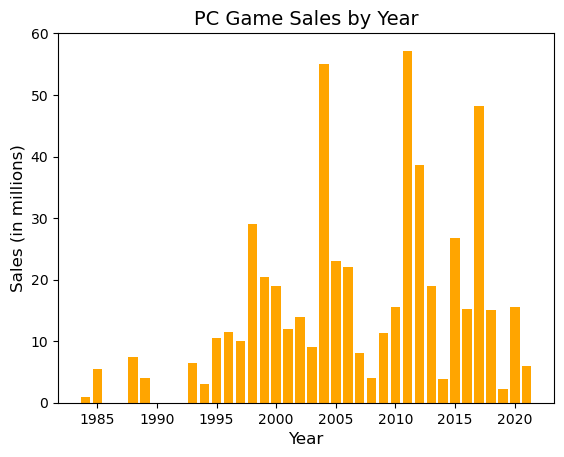

In [4]:
plt.bar(sales_by_year['Release_Year'], sales_by_year['Sales'], color = 'orange')
plt.title('PC Game Sales by Year', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Sales (in millions)', fontsize = 12)
plt.show()